# E-Commerce Customer Churn EDA and Machine Learning Classfications
---

E-commerce Customer Churn

## Context:

The data set belongs to a leading online E-commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.

Features

| Column Name | Description |
| --- | --- |
|	Tenure                  | Tenure of a customer in the company.. |
|	WarehouseToHome         | Distance between the warehouse to the customer’s home|
|	NumberOfDeviceRegistered|    Total number of deceives is registered on a particular customer|
|	PreferedOrderCat        |    Preferred order category of a customer in the last month|
|	SatisfactionScore       |   Satisfactory score of a customer on service|
|	MaritalStatus           |   Marital status of a customer|
|	NumberOfAddress         |     Total number of added on a particular customer|
|	Complaint               |   Any complaint has been raised in the last month|
|	DaySinceLastOrder       |   Day since last order by customer|
|	CashbackAmount          |  Average cashback in last month|
|	Churn                   |   Churn flag|


For a hotel business, prediction of cancellation of bookings is important to manage the business. If the hotel can predict the cancellation of bookings, they can plan for the resources and manage the business better.

Essentially, if a guest cancel the booking, the hotel will lose the revenue. On the other hand, if the hotel overbooked the rooms, they will have to pay for the compensation to the guests. Therefore, it is important for the model to predict 


For this case, the Hotel are going to make the policy for booking cancellation. The policy is as follows:
If the model predicts that the booking will be cancelled, the hotel will offer the room to other guests.
If the model predicts that the booking will not be cancelled, the hotel will not offer the room to other guests.

In this case, assumed that the hotel could provide a reserved room for double booking case, or an upgrade to the rooms , or refund the ticket based on the booking date which is usually lower to present day's rate to minimize the loss of revenue; rather than losing potential revenue in the case of False Positive Prediction.

## Model Objective

| |  |
| --- | --- |
If Cancel == 1 (Yes), the booking is cancelled. | **Positive Class**
If Cancel == 0 (No), the booking is not cancelled. | **Negative Class**

The business will lose more revenue if the model predicts that the booking will not be cancelled, but it is actually cancelled. 

Therefore, the model should have a **lower False Negative** counts and **higher Recall Score** for the **positive class**,
we will use **Recall Score** and **F2 Score** as the evaluation metrics for the model.

## Outline

1. Data Preparation
2. Model Selection based on F2 Score
    - Logistic Regression
    - Decision Tree
    - KNN 
    - Voting Classifier (Logistic Regression, Decision Tree, KNN)
    - Stacked Model (Logistic Regression, Decision Tree, KNN)
    - Random Forest
    - XGBoost
3. Best Model Tuning and Evaluation
4. Conclusion

# 1. Initiate Library & Import Data

In [145]:
#Load data
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [146]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
#Load data
df = pd.read_csv('/Users/Dwika/My Projects/CAPSTONE 3 PURWADHIKA/DATA/data_ecommerce_customer_churn.csv')

In [148]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [149]:
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

In [150]:
#Construct deep Info on columns & values:

datainfo = []
for i in df.columns:
    datainfo.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(datainfo, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[1.0, 13.0, 30.0]"
1,WarehouseToHome,float64,169,4.29,33,"[14.0, 14.0, 9.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 4, 3]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 5, 4]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Married]"
6,NumberOfAddress,int64,0,0.00,14,"[9, 3, 2]"
7,Complain,int64,0,0.00,2,"[0, 0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[8.0, 3.0, 7.0]"
9,CashbackAmount,float64,0,0.00,2335,"[260.77, 168.04, 137.23]"


## 2. Data Cleaning & Preprocessing

### 2.1 Duplicate Data Cleaning

In [151]:
#Check Duplicate data
df.duplicated().sum()   


671

In [152]:
#Drop duplicate
df = df.drop_duplicates()

### 2.2 Missing Data Cleaning

In [153]:
#Check missing value on specific columns
df.isnull().sum()


Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [154]:
#Check the columns which have missing value
missing_rows = df[df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].isnull().any(axis=1)]

In [155]:
len(missing_rows)

476

In [156]:
len(missing_rows) / len(df) * 100

14.5565749235474

In [157]:
len(df)

3270

## ***ATTEMPT 1: FILL ALL MISSING VALUES WITH MEDIAN***

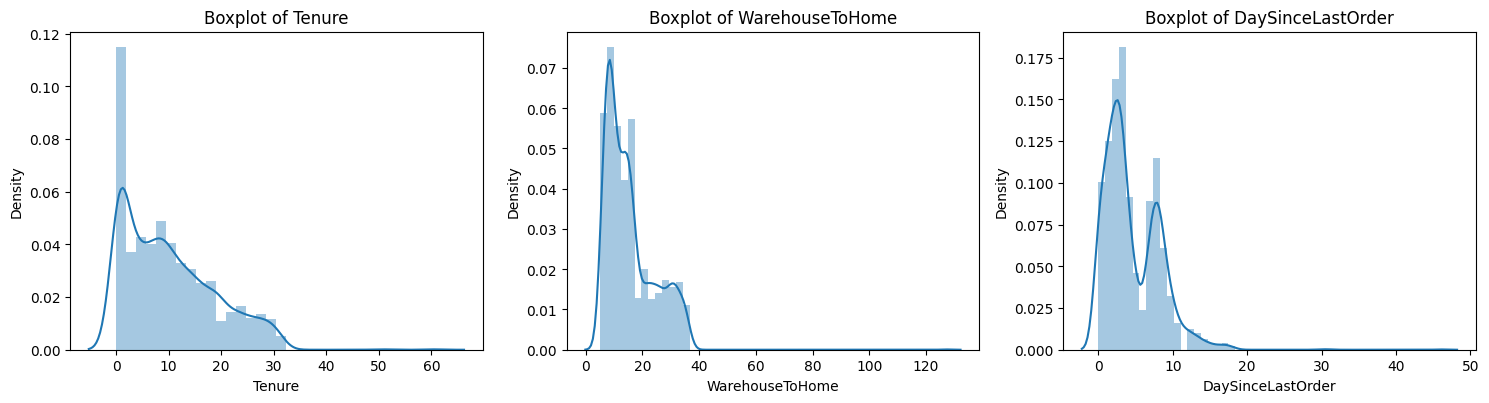

In [158]:
#Plot numerical columns distributions
numerical_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.distplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

> All columns are not normally distributed, so we fill the missing values with median.

In [159]:
#Fill missing value with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

## 2.2 Outliers Detection

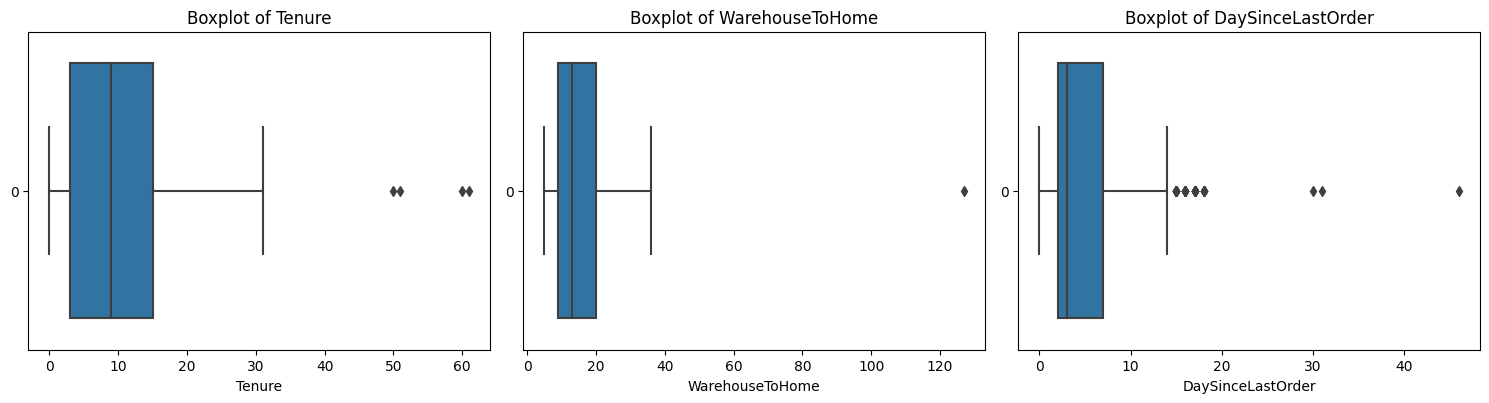

In [160]:
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

In [161]:
# Check the outliers
len(df[df['Tenure'] > 40])

4

In [162]:
# Check the outliers
len(df[df['WarehouseToHome'] > 40])

1

In [163]:
# Check the outliers
len(df[df['DaySinceLastOrder'] > 20])

3

In [164]:
#Find all outliers index
tenureOutliers = df[df['Tenure'] > 40].index
distanceOutliers = df[df['WarehouseToHome'] > 40]
lastorderOutliers = df[df['DaySinceLastOrder'] > 20]

#create list from indexes
outliers = list(tenureOutliers) + list(distanceOutliers.index) + list(lastorderOutliers.index)
outliers

[51, 449, 1209, 3778, 2717, 181, 3591, 3830]

> We will drop the total of 8 rows with outliers in the dataset.

In [165]:
# Remove outliers
df = df.drop(index=outliers)

In [166]:
df.describe().columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

## 2.3 Check for Data Anomalies

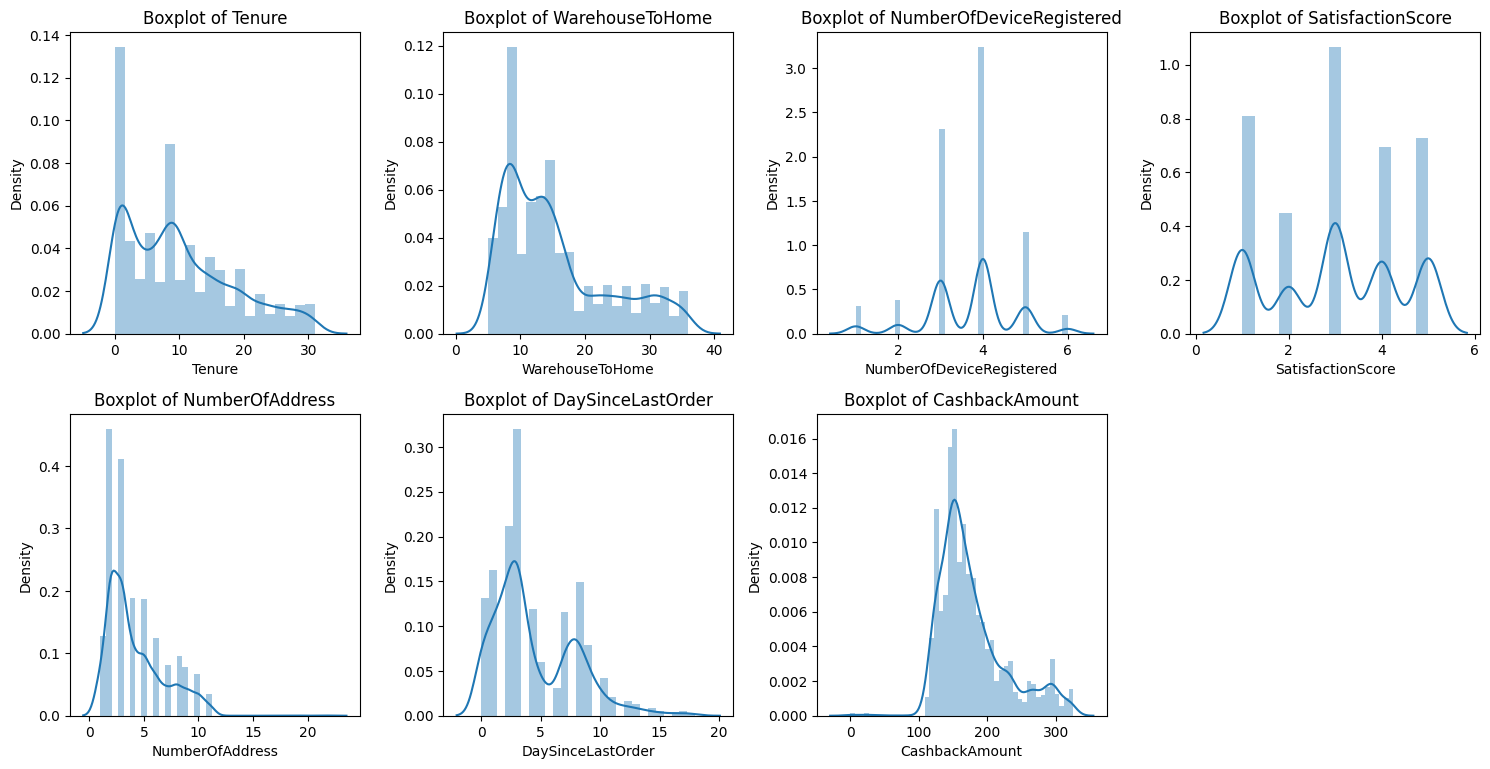

In [167]:
numerical_cols_recheck = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']


#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols_recheck, 1):
    plt.subplot(4, 4, i)
    sns.distplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

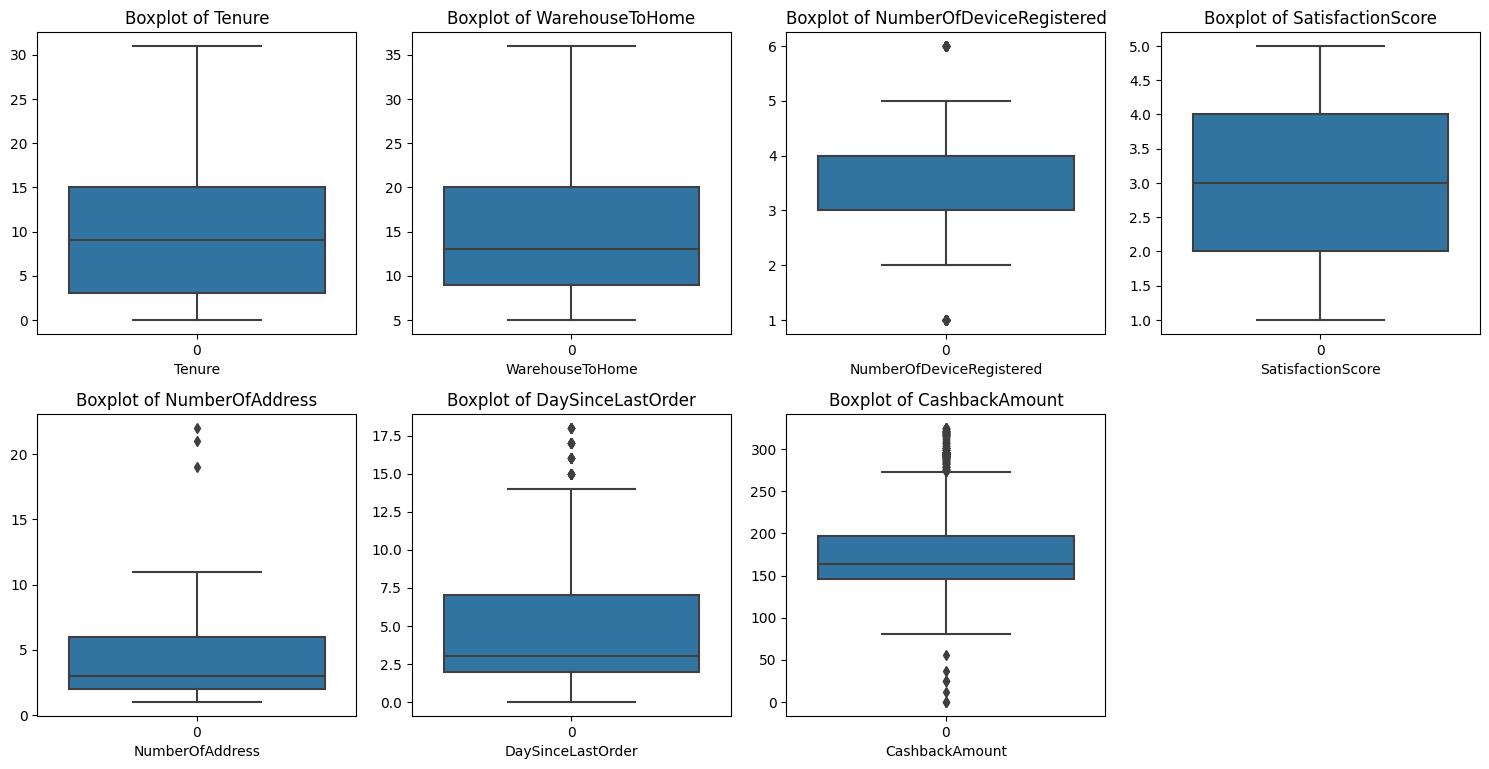

In [168]:
numerical_cols_recheck = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']


#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols_recheck, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

> We notice that there are few extreme outliers in NumberOfAddress column

In [169]:
#Check on NumberofAddress Outliers

df[df['NumberOfAddress'] > 15]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,9.0,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0


> We will drop this outliers to try reducing outlier impact on the model performance

In [170]:
#Drop outliers from NumberOfAddress
df = df.drop(index=df[df['NumberOfAddress'] > 15].index)

## 3. Feature Engineering

### 3.1 Feature Selection

In [171]:
#Check on current data features
ecommerceinfo = []
for i in df.columns:
    ecommerceinfo.append([i, df[i].dtypes,
                         df[i].nunique(), 
                    df[i].sample(2).values])
pd.DataFrame(ecommerceinfo, columns = ['dataFeatures', 'dataType', 'unique','uniqueSample'])


,dataFeatures,dataType,unique,uniqueSample
0,Tenure,float64,32,"[9.0, 21.0]"
1,WarehouseToHome,float64,32,"[26.0, 14.0]"
2,NumberOfDeviceRegistered,int64,6,"[4, 4]"
3,PreferedOrderCat,object,6,"[Laptop & Accessory, Laptop & Accessory]"
4,SatisfactionScore,int64,5,"[1, 3]"
5,MaritalStatus,object,3,"[Married, Single]"
6,NumberOfAddress,int64,11,"[2, 4]"
7,Complain,int64,2,"[0, 1]"
8,DaySinceLastOrder,float64,19,"[3.0, 1.0]"
9,CashbackAmount,float64,2331,"[169.9, 195.25]"


In [172]:
df.describe().columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

### 3.2 Create Transformer Schema

1. Target column: 
    - Churn, 1 if customer cancelled service, 0 if not

2. Scaling for numerical cols:
    - 'Tenure', 'WarehouseToHome',
       , 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount', 

3. OneHotEncoding for simple categorical cols:
    - 'MaritalStatus', 'Complaint'

4. Ordinal Encoding for ordinal cols:
    - 'SatisfactionScore'

5. Binary Encoding for categorical cols:
    - 'PreferedOrderCat'

In [173]:
#Import library for columns transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder

import category_encoders as ce


In [256]:
#Create transformer

transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['MaritalStatus', 'Complain']),
    ('MinMaxScaler', MinMaxScaler(), [
        'Tenure',
        'WarehouseToHome',
        'DaySinceLastOrder'
        # 'CashbackAmount'
        ]
     ),
    ('RobustScaler', RobustScaler(), ['CashbackAmount']),
    ('Ordinal', OrdinalEncoder(categories='auto'), ['SatisfactionScore']),
    ('Binary', ce.BinaryEncoder(),['PreferedOrderCat'] )
], remainder='passthrough')

In [257]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['MaritalStatus', 'Complain']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('RobustScaler', RobustScaler(),
                                 ['CashbackAmount']),
                                ('Ordinal', OrdinalEncoder(),
                                 ['SatisfactionScore']),
                                ('Binary', BinaryEncoder(),
                                 ['PreferedOrderCat'])])

## 4. Train Test Split Data

In [213]:
#Train Test Split

from sklearn.model_selection import train_test_split

X = df.drop(['Churn'],axis=1)
y = df['Churn']

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2023
)

In [198]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((2607, 10), (652, 10), (2607,), (652,))

## 5. Model Selection

### 5.1 Model Fit and Evaluation

In [199]:
#Import Evaluation Metrics Library
from sklearn.metrics import classification_report, make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [200]:
#Import Base Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#Initiate Base Models
logreg = LogisticRegression(solver='liblinear', random_state=10)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()


In [214]:
#Initiate fit and score
pipe_base = Pipeline([
    ('transformer', transformer),
    ('model', logreg)
])

pipe_base.fit(Xtrain, ytrain)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'Complain']),
                                                 ('MinMaxScaler',
                                                  RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('Ordinal', OrdinalEncoder(),
                                                  ['SatisfactionScore']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['PreferedOrderCat'])])),
                ('model',
                 LogisticRegression(random_state=10, solver='liblinear'))])

In [215]:
print('Logistic Regression Base Train Score : ', pipe_base.score(Xtrain, ytrain)) 


Logistic Regression Base Train Score :  0.889144610663598


In [216]:
pred = pipe_base.predict(Xtest)

In [217]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       546
           1       0.65      0.41      0.50       106

    accuracy                           0.87       652
   macro avg       0.77      0.68      0.71       652
weighted avg       0.85      0.87      0.86       652



In [218]:
fbeta_score(ytest, pred, beta=2)

0.4387755102040816

---

In [219]:
#Import Ensemble Models
from sklearn.ensemble import VotingClassifier, StackingClassifier


# Initiate Ensemble Models - Various Types
vc = VotingClassifier(estimators=[
    ('dtc', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', logreg)
], voting='hard')

sc = StackingClassifier(estimators=[ 
    ('dtc', dtc),
    ('knn', knn),
    ('lr', logreg)
])

In [204]:
from sklearn.ensemble import RandomForestClassifier

#Ensemble Models - Same Type (Bagging)
rf = RandomForestClassifier(random_state=2023)


In [205]:
#Ensemble Models - Same Type (Boosting)
#----------------
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Create Classifier
ada = AdaBoostClassifier(random_state=2023)
gbc = GradientBoostingClassifier(random_state=2023)
xgb = XGBClassifier(random_state=2023)

## Loop Through Models

In [234]:
#Loop through models with no imbalance data handling

from sklearn.pipeline import Pipeline

f2_scoresheet = make_scorer(fbeta_score, beta=2)

model_list = [dtc, knn, logreg, vc, sc, rf, ada, gbc, xgb]

#Model names for dataframe
model_names = ['DT', 'KNN', 'logreg', 'VotingClf', 'StackClf', 'RandForest', 'ADA', 'GBC', 'XGB']

#Model selection score list
model_score = []
f2_score = []
std = []



#Loop through the model list
for i in model_list:
    model_pipe = Pipeline([
        ('prep', transformer),
        ('algo', i)
    ])
    
    pipecv = cross_val_score(model_pipe, Xtrain, ytrain, cv=5, scoring=f2_scoresheet)
    
    model_score.append(pipecv)
    f2_score.append(pipecv.mean())
    std.append(pipecv.std())

# Create Dataframe
scoresheet = pd.DataFrame({
    'Model': [modelname for modelname in model_names],
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)

#Display the resulting Dataframe
scoresheet


,Model,F2 Score,Std
8,XGB,0.656318,0.030067
0,DT,0.633509,0.025673
6,ADA,0.608027,0.046356
5,RandForest,0.607585,0.042273
7,GBC,0.605644,0.027425
4,StackClf,0.587878,0.030405
3,VotingClf,0.515660,0.043177
2,logreg,0.515652,0.044196
1,KNN,0.341461,0.031238


In [258]:
#Loop through models with imbalance data handling


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

f2_scoresheet = make_scorer(fbeta_score, beta=2)

smote = SMOTE(random_state=2023)
ROS = RandomOverSampler(random_state=2023)
RUS = RandomUnderSampler(random_state=2023)  
NM = NearMiss()


model_list = [dtc, knn, logreg, vc, sc, rf, ada, gbc, xgb]
resample = [smote, ROS, RUS, NM]

#Model names for dataframe
model_names = ['DT', 'KNN', 'logreg', 'VotingClf', 'StackClf', 'RandForest', 'ADA', 'GBC', 'XGB']
resample_names = ['SMOTE', 'ROS', 'RUS', 'NM']

#Model selection score list
model_score = []
f2_score = []
std = []



#Loop through the model list
for i in model_list:
    for j in resample:  
        model_pipe = Pipeline([
            ('prep', transformer),
            ('imba', j),
            ('algo', i)
        ])
        
        pipecv = cross_val_score(model_pipe, Xtrain, ytrain, cv=5, scoring=f2_scoresheet)
        
        model_score.append(pipecv)
        f2_score.append(pipecv.mean())
        std.append(pipecv.std())

# Create Dataframe
scoresheet = pd.DataFrame({
    'Model': [modelname+"-"+resamplename for modelname in model_names for resamplename in resample_names],
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)

#Display the resulting Dataframe
scoresheet


,Model,F2 Score,Std
22,RandForest-RUS,0.763294,0.016110
29,GBC-ROS,0.757680,0.017479
34,XGB-RUS,0.745798,0.015598
30,GBC-RUS,0.740108,0.023588
33,XGB-ROS,0.728270,0.032980
25,ADA-ROS,0.712783,0.023982
26,ADA-RUS,0.711384,0.027883
28,GBC-SMOTE,0.699463,0.021870
18,StackClf-RUS,0.697910,0.008944
21,RandForest-ROS,0.694380,0.039715


## 5.3 Apply Best Model & Evaluate Parameter

In [260]:
#Apply Best Model to Test Data
#----------------
#Model      : Random Forest
#Resampling : RandomUnderSampler

#Create Pipeline
pipe_rf = Pipeline([
    ('prep', transformer),
    ('imba', RUS),
    ('algo', rf)
])

#Fit Pipeline
pipe_rf.fit(Xtrain, ytrain)
pipe_rf.score(Xtrain, ytrain), pipe_rf.score(Xtest, ytest), cross_val_score(pipe_rf, Xtrain, ytrain, cv=5, scoring=f2_scoresheet).mean()

(0.8945147679324894, 0.848159509202454, 0.7632935008095517)

In [262]:
fbeta_score(ytest, pipe_rf.predict(Xtest), beta=2)

0.7711442786069653

In [283]:
pred_test_untuned = pipe_rf.predict(Xtest)

## 6. Best Model Hyperparameter Tuning and Evaluation

In [308]:
#Random Forest Model Tuning

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import kfold
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

#setup the parameter grid for RF
space = {
    'algo__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)],
    'algo__max_depth': np.arange(1, 21, 1),
    'algo__min_samples_split': np.arange(2, 51, 3),
    'algo__min_samples_leaf': np.arange(1, 51, 3),
    'algo__max_features': ['auto', 'sqrt', 'log2']
}

#Initiate GridSearchCV
rf_grid = RandomizedSearchCV(pipe_rf, param_distributions=space, cv=kfold, n_iter=500, scoring=f2_scoresheet, verbose=2, n_jobs=-1)  #n_jobs=-1 means using all processor
rf_grid


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MaritalStatus',
                                                                                'Complain']),
                                                                              ('MinMaxScaler',
                                                                               MinMaxScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('RobustScaler',
                                                                               RobustScaler(),
                                                                               ['...
                   param_distributions={'algo__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'algo__max_features': ['auto', 'sqrt',
                                                               'log2'],
                                        'algo__min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]),
                                        'algo__min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50]),
                                        'algo__n_estimators': [100, 400, 700,
                                                               1000]},
                   scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [307]:
nnn_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 8)]
nnn_estimators

[100, 228, 357, 485, 614, 742, 871, 1000]

In [292]:
np.arange(100, 1001, 100)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [309]:
#Apply GridSearchCV to Train Data
rf_grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=11, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=11, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=5, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=5, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.0s[CV] END algo__max_depth=5, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.0s



/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=5, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.6s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=10, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=14, algo__n_estimators=1000; total time=   0.7s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=14, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=14, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=14, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=14, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.3s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.3s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.3s
[CV] END algo__max_depth=8, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.6s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_sampl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=47, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=47, algo__n_estimators=1000; total time=   0.7s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=47, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=49, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=19, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=41, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=41, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=41, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=46, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=38, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=38, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=16, algo_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=11, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=11, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=50, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=37, algo__mi

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=50, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=50, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=38, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=26, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=26, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=26, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=26, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=26, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_sa

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.7s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=23, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_sampl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_sp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=16, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.6s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.6s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_sa

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.6s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=46, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=9, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=9, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_sa

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=47, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=47, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=47, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__mi

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=11, algo__n_estimators=1000; total time=   0.8s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=11, algo__n_estimators=1000; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=11, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=1, algo

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=16, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_sa

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=16, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=16, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=11, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.3s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_sample

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.8s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=17, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=17, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=17, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=17, algo__n_estimators=700; total time=   1.1s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=17, algo__n_estimators=700; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.1s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=20, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=14, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=22, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=22, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=22, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_sampl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_sa

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=1, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=13, al

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=7, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=34, algo

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.7s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=11, algo__n_estimators=1000; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=8, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=26, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=26, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_sampl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=8, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=11, algo__max_features=auto, algo__min_samples_leaf=49, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=46, algo__min_sam

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=11, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_sample

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=49, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=43, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.3s
[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=2, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=2, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=2, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=32, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=50, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=14, algo__n_estimators=100; total time=   0.3s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=31, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=8, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_split=2, algo__n_estimators=700; total time=   1.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_spl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=3, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=10, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=29, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=25, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=8, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=26, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=40, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=22, algo__

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=25, algo__min_samples_split=8, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=47, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=18, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=19, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.5s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=49, algo_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.3s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.3s
[CV] END algo__max_depth=17, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=50, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=1000; total time=   1.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=1000; total time=   1.6s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=50, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=41, algo__n_estimators=1000; total time=   1.6s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=31, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=16, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=31, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=46, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=31, algo__mi

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=31, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=9, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=11, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=1, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=16, algo__min_samples_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=10, algo__min_samples_split=8, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=3, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=1, algo__max_features=log2, algo__min_samples_leaf=43, algo__

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=10, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=18, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.7s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=11, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=23, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=20, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=10, algo__mi

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=34, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=19, algo__min_samples_split=29, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=19, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=46, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=43, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=18, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=44, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=47, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=47, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=12, algo__max_features=sqrt, algo__min_samples_leaf=10, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=47, algo__n_estimators=400; total time=   0.7s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=9, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.6s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=17, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=32, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=26, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=35, algo__n_estimators=700; total time=   0.7s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=12, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=38, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=13, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=17, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samples_split=2, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=19, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.0s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=34, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=7, algo__

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=29, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_sa

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=15, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=8, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=22, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=16, algo__max_features=log2, algo__min_samples_leaf=37, a

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=44, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=5, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=5, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=10, algo__max_features=auto, algo__min_samples_leaf=4, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.1s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=7, algo__min_samples_split=38, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=38, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=8, algo__max_features=auto, algo__min_samples_leaf=49, algo__min_samples_split=44, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=5, algo__max_features=sqrt, algo__min_samples_leaf=19, algo__min_s

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=1, algo__min_samples_split=32, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples_split=23, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=12, algo__max_features=log2, algo__min_samples_leaf=13, algo__min_samples

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=50, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=4, algo__min_samples_split=20, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=34, algo__min_

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=19, algo__max_features=log2, algo__min_samples_leaf=16, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=2, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=14, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=44, algo__n_estimators=700; total time=   1.1s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=44, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=44, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=16, algo__min_samples_split=44, algo__n_estimators=700; total time=   1.0s
[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=14, algo__max_features=log2, algo__min_samples_leaf=37, algo__min_samples_split=23, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   1.0s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=5, algo__max_features=auto, algo__min_samples_leaf=10, algo__min_samples_split=14, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=7, algo__max_features=auto, algo__min_samples_leaf=7, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min_samples_split=32, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=15, algo__max_features=sqrt, algo__min_samples_leaf=37, algo__min

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.1s
[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=4, algo__max_features=auto, algo__min_samples_leaf=13, algo__min_samples_split=8, algo__n_estimators=400; total time=   0.6s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=5, algo__max_features=log2, algo__min_samples_leaf=49, algo__min_samples_split=11, algo__n_estimators=1000; total time=   1.4s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.4s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=43, algo__min_samples_split=47, algo__n_estimators=1000; total time=   1.3s
[CV] END algo__max_depth=14, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=29, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=43, algo

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=17, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=20, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=28, algo__min_samples_split=11, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=20, algo__max_features=auto, algo__min_samples_leaf=28, algo__m

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=10, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=35, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=1, algo__min_samples_split=11, algo__n_estimators=400; total time=   0.8s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.6s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=19, algo__max_features=sqrt, algo__min_samples_leaf=40, algo__min_samples_split=50, algo__n_estimators=700; total time=   0.9s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=15, algo__max_features=auto, algo__min_samples_leaf=37, algo__min_samples_split=41, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.3s
[CV] END algo__max_depth=6, algo__max_features=sqrt, algo__min_samples_leaf=28, algo__min_samples_split=41, algo__n_estimators=100; total time=   0.1s
[CV] END algo__max_depth=13, algo__max_features=auto, algo__min_samples_leaf=43, algo__min_samples_split=5, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=7, algo__min_sampl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=3, algo__max_features=sqrt, algo__min_samples_leaf=25, algo__min_samples_split=5, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_split=41, algo__n_estimators=700; total time=   0.9s
[CV] END algo__max_depth=4, algo__max_features=sqrt, algo__min_samples_leaf=4, algo__min_samples_spl

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=2, algo__max_features=auto, algo__min_samples_leaf=40, algo__min_samples_split=32, algo__n_estimators=700; total time=   0.8s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=20, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samples_split=35, algo__n_estimators=100; total time=   0.2s
[CV] END algo__max_depth=1, algo__max_features=sqrt, algo__min_samples_leaf=43, algo__min_samp

/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.5s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=4, algo__max_features=log2, algo__min_samples_leaf=28, algo__min_samples_split=35, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.3s


/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/Dwika/My Projects/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.5s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=7, algo__max_features=log2, algo__min_samples_leaf=22, algo__min_samples_split=23, algo__n_estimators=1000; total time=   1.2s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_samples_split=2, algo__n_estimators=400; total time=   0.4s
[CV] END algo__max_depth=6, algo__max_features=auto, algo__min_samples_leaf=25, algo__min_sa

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MaritalStatus',
                                                                                'Complain']),
                                                                              ('MinMaxScaler',
                                                                               MinMaxScaler(),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('RobustScaler',
                                                                               RobustScaler(),
                                                                               ['...
                   param_distributions={'algo__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'algo__max_features': ['auto', 'sqrt',
                                                               'log2'],
                                        'algo__min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]),
                                        'algo__min_samples_split': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50]),
                                        'algo__n_estimators': [100, 400, 700,
                                                               1000]},
                   scoring=make_scorer(fbeta_score, beta=2), verbose=2)

In [310]:
#Check the best parameters
best_params = rf_grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'algo__n_estimators': 400, 'algo__min_samples_split': 11, 'algo__min_samples_leaf': 1, 'algo__max_features': 'log2', 'algo__max_depth': 17}


In [311]:
# Evaluate the model on the test set

#Fit model on train data
rf_grid.best_estimator_.fit(Xtrain, ytrain)

#Create prediction
pred = rf_grid.predict(Xtest)

In [312]:
#Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       546
           1       0.50      0.85      0.63       106

    accuracy                           0.84       652
   macro avg       0.73      0.84      0.76       652
weighted avg       0.89      0.84      0.85       652



In [300]:
#F2 Score un-Tuned Model
fbeta_score(ytest, pipe_rf.predict(Xtest), beta=2)

0.7711442786069653

In [313]:
fbeta_score(ytest, rf_grid.predict(Xtest), beta=2)

0.7438016528925621